In [1]:
import pandas as pd
input_file = "results/direct/chart2code_Qwen2-VL-Chat_DirectAgent_results.json"
data = pd.read_json(input_file, lines=True)

In [4]:
import json
data = "```python\\nimport matplotlib.pyplot as plt\\nimport numpy as np\\n\\n# Data\\nx = np.array([1, 2, 3, 4])\\ny = np.array([1, 2, 3, 4])\\nz = np.zeros_like(x)\\ndx = dy = 0.5\\ndz = np.array([4, 3, 2, 1])\\n\\n# Plot\\nfig = plt.figure(figsize=(8.0, 6.0))\\nax = fig.add_subplot(111, projection='3d')\\n\\nax.bar3d(x, y, z, dx, dy, dz, color='r', zsort='average')\\n\\n# Labels\\nax.set_xlabel('Height')\\nax.set_ylabel('Width')\\nax.set_zlabel('Count')\\n\\nplt.show()\\n```"
data = json.load(data)
with open('temp.txt', 'w') as f:
    f.write(data)

AttributeError: 'str' object has no attribute 'read'

In [26]:
with open('results/direct/chart2code_gpt-4o_DirectAgent_results.json', 'r') as f:
    lines = f.readlines()
    data = [json.loads(line) for line in lines]


In [27]:
item = json.loads(data[0]["response"])
with open('temp.txt', 'w') as f:
    f.write(item["choices"][0]["message"]["content"])


In [24]:
import matplotlib.pyplot as plt  
import numpy as np  
from matplotlib.colors import LinearSegmentedColormap  
from matplotlib.colors import BoundaryNorm  
  
# Sample data for plot_dna  
matrix = np.random.rand(100, 100)  
col_names = [f"Gene {i}" for i in range(100)]  
label = [f"Sample {i}" for i in range(100)]  
  
# Plotting  
plt.figure(figsize=(6.0, 12.0))  
cmap_list = ["red", "darkred", "green", "lime", "lightgreen"]  
cmap = LinearSegmentedColormap.from_list("Custom cmap", cmap_list, len(cmap_list))  
cmap.set_bad("black")  
  
mat_min = np.min(matrix)  
mat_max = np.max(matrix)  
mat_min = -np.max([np.abs(mat_min), mat_max])  
mat_max = np.max([np.abs(mat_min), mat_max])  
matrix = np.ma.masked_where(np.abs(matrix) <= 0.3, matrix)  
  
bounds = np.linspace(mat_min + 6, mat_max - 6, 5)  
idx = np.searchsorted(bounds, 0)  
bounds = np.insert(bounds, idx, 0)  
norm = BoundaryNorm(bounds, cmap.N)  
  
plt.imshow(matrix, cmap=cmap, norm=norm)  
plt.xticks(np.arange(len(label)))  
plt.yticks(np.arange(len(col_names)))  
ax = plt.gca()  
ax.set_xticklabels(label, rotation=90)  
ax.set_yticklabels(col_names)  
ax.yaxis.tick_right()  
ax.tick_params(axis='both', which='both', labelsize=5, length=0.0)  
plt.tight_layout()  
plt.show()  

ValueError: bins must be monotonically increasing or decreasing

<Figure size 600x1200 with 1 Axes>

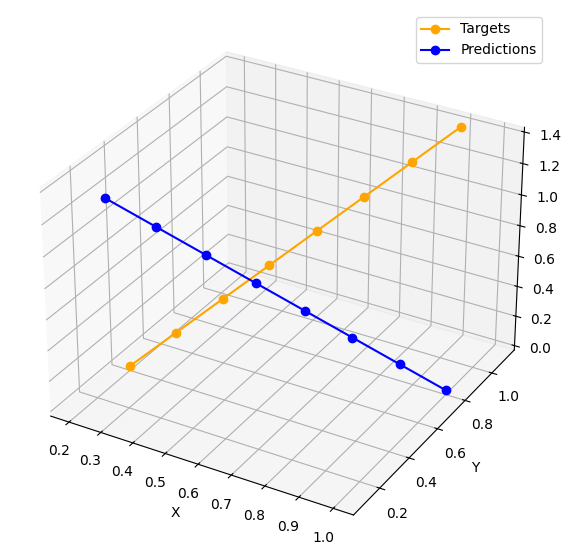

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Sample data for the skeletons
# These are just example coordinates and may not match the original exactly
targets = np.array([
    [0.2, 0.4, 0.0],
    [0.3, 0.5, 0.2],
    [0.4, 0.6, 0.4],
    [0.5, 0.7, 0.6],
    [0.6, 0.8, 0.8],
    [0.7, 0.9, 1.0],
    [0.8, 1.0, 1.2],
    [0.9, 1.1, 1.4]
])

predictions = np.array([
    [1.0, 0.8, 0.0],
    [0.9, 0.7, 0.2],
    [0.8, 0.6, 0.4],
    [0.7, 0.5, 0.6],
    [0.6, 0.4, 0.8],
    [0.5, 0.3, 1.0],
    [0.4, 0.2, 1.2],
    [0.3, 0.1, 1.4]
])

# Create a new figure
fig = plt.figure(figsize=(7.0, 7.0))
ax = fig.add_subplot(111, projection='3d')

# Plot the targets
ax.plot(targets[:, 0], targets[:, 1], targets[:, 2], 'o-', color='orange', label='Targets')

# Plot the predictions
ax.plot(predictions[:, 0], predictions[:, 1], predictions[:, 2], 'o-', color='blue', label='Predictions')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [6]:
import os  
import json  
  
# 设置目录路径  
directory_path = '/mnt/lingjiejiang/multimodal_code/data/chart_data/github_chart'  
output_file_path = "/mnt/lingjiejiang/multimodal_code/data/chart_data/revised_code/final_output.json"  
save_directory_path = 'ourdata_revise/code'  
  
# 确保保存目录存在  
os.makedirs(save_directory_path, exist_ok=True)  
  
# 读取 JSON 数据  
with open(output_file_path, 'r') as f:  
    chart_data = json.load(f)  
  
# 更新 ID 并保存前 50 个文本到文件  
for idx, item in enumerate(chart_data):  
    # 更新 ID 为五位数格式  
    item['id'] = f"{idx + 1:05d}"  
      
    # # 只处理前 1000000 个项目  
    if idx < 50:  
        # 获取文本内容  
        text_content = item['revised_text']  
          
        # 保存文件路径  
        file_path = os.path.join(save_directory_path, f"{item['id']}.py")  
          
        # 写入文本到文件  
        with open(file_path, 'w') as py_file:  
            py_file.write(text_content)  
  
print("处理完成，前 1000000 个文件已保存。")  

处理完成，前 1000000 个文件已保存。


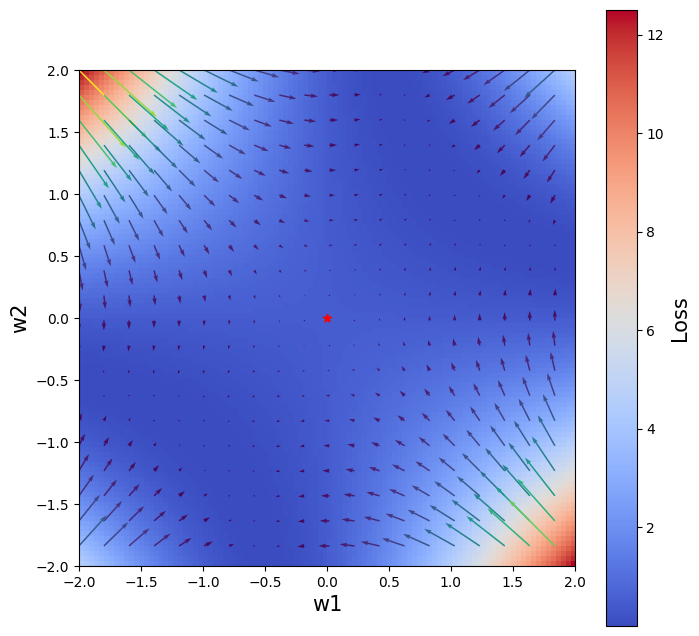

In [37]:
import matplotlib.pyplot as plt  
import numpy as np  

# Create weight space
n_w = 100
w1 = np.linspace(-2, 2, num=n_w)  
w2 = np.linspace(2, -2, num=n_w)  
ws_x, ws_y = np.meshgrid(w1, w2)
cost_ws = np.zeros((n_w, n_w))  

# Fill the cost matrix for each combination of weights
x, y, v, l2 = 1, 1, 0.0, 0.0
for i in range(n_w):
    for j in range(n_w):
        y_pred = ws_x[i, j] * ws_y[i, j] * x
        y_true = y
        cost_ws[i, j] = 0.5 * (y_true - y_pred)**2 + \
            0.5 * l2 * (ws_x[i, j]**2 + ws_y[i, j]**2) + 0.5 * v * (ws_x[i, j]*ws_y[i, j])**2

# Compute gradients
dy, dx = np.gradient(cost_ws)

# Plot vector space
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(cost_ws, extent=[ws_x.min(), ws_x.max(), ws_y.min(), ws_y.max()], cmap='coolwarm')
ax.quiver(ws_x[::5, ::5], ws_y[::5, ::5], -dx[::5, ::5], dy[::5, ::5], cost_ws[::5, ::5])
cbar = fig.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Loss', fontsize=15)

ax.set_xlabel('w1', fontsize=15)
ax.set_ylabel('w2', fontsize=15)

# Add saddle point
ax.scatter(0, 0, label='Saddle point', c='red', marker='*')

plt.show()

In [38]:
chart_data[:2]

[{'index': 0,
  'revised_text': "import matplotlib.pyplot as plt  \nimport numpy as np  \nfrom matplotlib import cm  \n\n# Sample Hamiltonian matrix\nH = np.array([[1, 2, 3, 4], [2, 5, 6, 7], [3, 6, 8, 9], [4, 7, 9, 10]])\n\n# Plot the absolute value of the Hamiltonian matrix\nplt.figure(figsize=(6.0, 4.0))  \nplt.matshow(abs(H), cmap=cm.jet, fignum=1)  \nplt.title('Hamiltonian')  \nplt.colorbar()  \nplt.show()",
  'category': 'Heatmap',
  'chart_size': [6.0, 4.0],
  'gpt_answer': "<REVISED CODE BEGIN>  \nimport matplotlib.pyplot as plt  \nimport numpy as np  \nfrom matplotlib import cm  \n\n# Sample Hamiltonian matrix\nH = np.array([[1, 2, 3, 4], [2, 5, 6, 7], [3, 6, 8, 9], [4, 7, 9, 10]])\n\n# Plot the absolute value of the Hamiltonian matrix\nplt.figure(figsize=(6.0, 4.0))  \nplt.matshow(abs(H), cmap=cm.jet, fignum=1)  \nplt.title('Hamiltonian')  \nplt.colorbar()  \nplt.show()  \n<REVISED CODE END>  \n\n<CATEGORY>: [Heatmap]  \n<CHART SIZE>: (6.0, 4.0)  ",
  'max_stars_repo_path': '

In [12]:
import os  
import json  
  
# 设置目录路径  
# directory_path = '/mnt/lingjiejiang/multimodal_code/data/chart_data/github_chart'  
output_file_path = "/mnt/lingjiejiang/multimodal_code/data/chart_data/revised_code_supply/final_output_empty.json"  
save_directory_path = 'ourdata_revise_empty/code'  
  
# 确保保存目录存在  
os.makedirs(save_directory_path, exist_ok=True)  
  
# 读取 JSON 数据  
with open(output_file_path, 'r') as f:  
    chart_data = json.load(f)  
  
# 更新 ID 并保存前 50 个文本到文件  
for idx, item in enumerate(chart_data):  
    # 更新 ID 为五位数格式  
    item['id'] = f"{idx + 1:05d}"  
      
    # # 只处理前 1000000 个项目  
    if idx < 50:  
        # 获取文本内容  
        text_content = item['revised_text']  
          
        # 保存文件路径  
        file_path = os.path.join(save_directory_path, f"{item['id']}.py")  
          
        # 写入文本到文件  
        with open(file_path, 'w') as py_file:  
            py_file.write(text_content)  
  
print("处理完成，前 1000000 个文件已保存。")  

处理完成，前 1000000 个文件已保存。


In [13]:
len(chart_data)

10

In [14]:
chart_data[:5]

[{'index': 7,
  'revised_text': "import matplotlib.pyplot as plt\nimport numpy as np\n\n# Generate a sample matrix\nmatrix = np.zeros((12, 12))\nfor i in range(min(matrix.shape)):\n    matrix[i, i] = i\n\n# Set up the figure and display the heatmap\nplt.figure(figsize=(6.0, 6.0))\nplt.matshow(matrix, cmap='viridis')\n\n# Show the plot\nplt.show()",
  'category': 'Heatmap',
  'chart_size': [6.0, 6.0],
  'gpt_answer': "```python\n<REVISED CODE BEGIN>\nimport matplotlib.pyplot as plt\nimport numpy as np\n\n# Generate a sample matrix\nmatrix = np.zeros((12, 12))\nfor i in range(min(matrix.shape)):\n    matrix[i, i] = i\n\n# Set up the figure and display the heatmap\nplt.figure(figsize=(6.0, 6.0))\nplt.matshow(matrix, cmap='viridis')\n\n# Show the plot\nplt.show()\n<REVISED CODE END>\n\n<CATEGORY>: [Heatmap]\n<CHART SIZE>: (6.0, 6.0)\n```",
  'max_stars_repo_path': 'examples/pylab_examples/matshow.py',
  'max_stars_repo_name': 'jbbrokaw/matplotlib',
  'max_stars_count': 16,
  'id': '00001',

In [6]:
len(chart_data)

5

In [7]:
import json  
import re  
  
# 文件路径  
output_file_path = '/mnt/lingjiejiang/multimodal_code/data/chart_data/github_chart/merged_empty_data.json'  
  
# 读取 JSON 数据  
with open(output_file_path, 'r') as f:  
    chart_data = json.load(f)  
print(len(chart_data)) 
# 正则表达式模式  
pattern = r'""".*?"""'  
  
# 处理每个字典中的 `text` 字段  
for item in chart_data:  
    if 'text' in item:  
        item['text'] = re.sub(pattern, '', item['text'], flags=re.DOTALL)  
        item["text"] = item["text"].strip()
  
# # 如果你想将修改后的数据保存回文件中，可以使用以下代码  
# with open(output_file_path, 'w') as f:  
#     json.dump(chart_data, f, indent=4)  
  
modify_path = "/mnt/lingjiejiang/multimodal_code/data/chart_data/revised_code_supply/final_output_empty_processed.json"
# 如果你不想覆盖原始文件，可以将其保存到另一个文件中  
with open(modify_path, 'w') as f:  
    json.dump(chart_data, f, indent=4)  

32866


In [19]:
with open(modify_path, 'r') as f:
    data = json.load(f)
len(data)

0

In [20]:
chart_data[:2]

[]